In [44]:
%load_ext autoreload
%autoreload 2
import os
import numpy as n
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import pickle
import numpy.lib.recfunctions as rfn
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from modules import utils

### Load the data

In [3]:
data_file = 'data/all_data.p'

f = open(data_file, 'rb')
all_data = pickle.load(f)

In [4]:
experiment = all_data['Female1']

In [5]:
# Save timestamps into variable
ts = experiment['t']
# Save annotations into variable
annotations = experiment['ann']

## Calculate some features

In [6]:
vectors = {'rear_1' : ('ImplantedTailBase_1', 'BackCenter_1'),
           'rear_2' : ('InteracteeTailBase_2', 'BackCenter_2'),
           'front_1': ('BackCenter_1', 'NapeCenter_1'),
           'front_2': ('BackCenter_2', 'NapeCenter_2'),
           'head_1' : ('NapeCenter_1', ('GreenTape_1', 'RedTape_1')),
           'head_2' : ('NapeCenter_2', ('YellowEar_2', 'OrangeEar_2')),
           'front_1_to_front_2' : ('NapeCenter_1', 'NapeCenter_2'),
           'front_2_to_front_1' : ('NapeCenter_2', 'NapeCenter_1'),
           'front_1_to_rear_2' : ('NapeCenter_1', 'InteracteeTailBase_2'),
           'front_2_to_rear_1' : ('NapeCenter_2', 'ImplantedTailBase_1'),
           'rear_1_to_rear_2' : ('BackCenter_1','BackCenter_2'),
           'rear_2_to_rear_1' : ('BackCenter_2','BackCenter_1')}
velocities_to_calculate = [
    'BackCenter_1',
    'BackCenter_2',
]

In [7]:
exp = utils.compute_and_add_vectors(experiment,vectors)
exp = utils.compute_and_add_velocities(exp, velocities_to_calculate)

## Format your dataset

In [8]:
from sklearn import preprocessing

In [9]:
labels = exp['ann']
unique_labels = n.unique(labels)
ts = exp['t']
features_to_use = [
    'rear_1_ang',
    'front_1_ang',
    'head_1_ang',
    'rear_1_ang',
    'front_1_ang',
    'head_1_ang',
    'BackCenter_1_vel_mag',
    'BackCenter_1_vel_ang',
    'rear_2_ang',
    'front_2_ang',
    'head_2_ang',
    'rear_2_ang',
    'front_2_ang',
    'head_2_ang',
    'BackCenter_2_vel_mag',
    'BackCenter_2_vel_ang',
]

In [21]:
n_timepoints = len(ts)
n_features = len(features_to_use)
n_labels = len(unique_labels)
Xs = n.zeros((n_timepoints, n_features))
Ys = n.zeros(n_timepoints)

In [22]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(unique_labels)
Ys = label_encoder.transform(labels)

In [23]:
for i in range(n_features):
    Xs[:,i] = exp[features_to_use[i]]
Xs[n.isnan(Xs)] = 0

## Split into train and test (using cross-validation)





In [26]:
from sklearn.model_selection import StratifiedKFold, KFold

In [35]:

n_splits = 2
splitter = StratifiedKFold(n_splits=n_splits, shuffle=False)

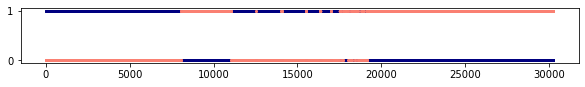

In [36]:

# splitter = KFold(n_splits=5, shuffle=False)


i = 0
plt.figure(figsize=(10,1))
for train, test in splitter.split(Xs, Ys):
    plt.scatter(train, [i]*len(train),s=1, color='navy')
    plt.scatter(test, [i]*len(test),s=1, color='salmon')
    i += 1

## Build Architecture


In [37]:
import torch
from torch import nn

In [52]:
# Set the architecture parameters
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
D_in = Xs.shape[1] 
D_out = n_labels
hidden_dims = [300,300,300]


# Set the learning parameter
N_batch = 16
n_epochs = 3
learning_rate = 1e-4
print_interval = 50



### EPOCH  0 ###
Batch   0, Train Loss: 7.053131, Test Loss: 7.533041, Test Correct Frac: 0.007
Batch  50, Train Loss: 0.834274, Test Loss: 1.140828, Test Correct Frac: 0.671


/tmp/ipykernel_7325/1480301380.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correct_preds = n.array(pred_labels == true_labels, n.int)


Batch 100, Train Loss: 0.989083, Test Loss: 1.153818, Test Correct Frac: 0.636
Batch 150, Train Loss: 0.267104, Test Loss: 1.009258, Test Correct Frac: 0.669
Batch 200, Train Loss: 0.568707, Test Loss: 0.905184, Test Correct Frac: 0.660
Batch 250, Train Loss: 0.805399, Test Loss: 0.963437, Test Correct Frac: 0.692
Batch 300, Train Loss: 0.756275, Test Loss: 1.051639, Test Correct Frac: 0.658
Batch 350, Train Loss: 0.630345, Test Loss: 0.928667, Test Correct Frac: 0.679
Batch 400, Train Loss: 1.447714, Test Loss: 1.043342, Test Correct Frac: 0.668
Batch 450, Train Loss: 0.497316, Test Loss: 0.966567, Test Correct Frac: 0.680
Batch 500, Train Loss: 0.353750, Test Loss: 0.918962, Test Correct Frac: 0.680
Batch 550, Train Loss: 0.682372, Test Loss: 0.913197, Test Correct Frac: 0.684
Batch 600, Train Loss: 0.344556, Test Loss: 0.989302, Test Correct Frac: 0.677
Batch 650, Train Loss: 0.155167, Test Loss: 0.997071, Test Correct Frac: 0.666
Batch 700, Train Loss: 0.647025, Test Loss: 0.927700

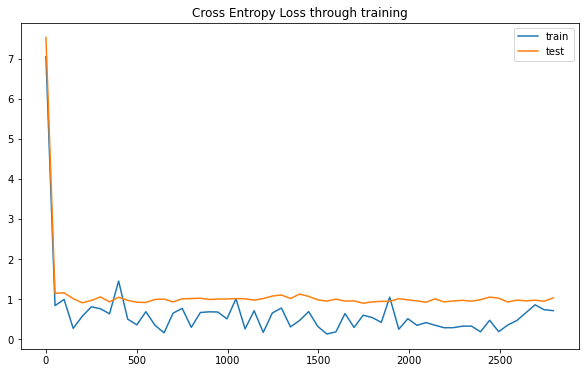

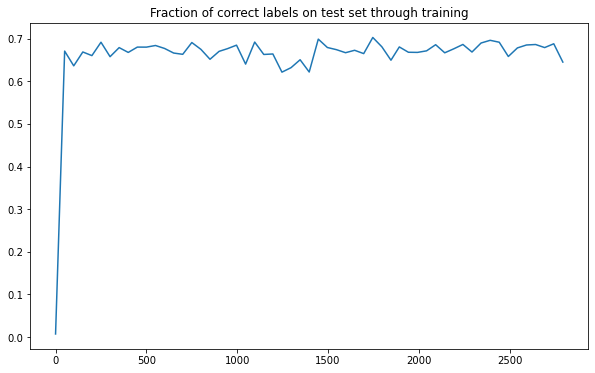

### EPOCH  0 ###
Batch   0, Train Loss: 4.908206, Test Loss: 8.005853, Test Correct Frac: 0.003
Batch  50, Train Loss: 0.657169, Test Loss: 1.167734, Test Correct Frac: 0.686


/tmp/ipykernel_7325/1480301380.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correct_preds = n.array(pred_labels == true_labels, n.int)


Batch 100, Train Loss: 0.815621, Test Loss: 1.088732, Test Correct Frac: 0.663
Batch 150, Train Loss: 0.846230, Test Loss: 0.885262, Test Correct Frac: 0.729
Batch 200, Train Loss: 0.568076, Test Loss: 0.910429, Test Correct Frac: 0.697
Batch 250, Train Loss: 0.288455, Test Loss: 1.063106, Test Correct Frac: 0.714
Batch 300, Train Loss: 0.852365, Test Loss: 1.123410, Test Correct Frac: 0.695
Batch 350, Train Loss: 0.390555, Test Loss: 0.920546, Test Correct Frac: 0.717
Batch 400, Train Loss: 1.119537, Test Loss: 0.879542, Test Correct Frac: 0.702
Batch 450, Train Loss: 0.709614, Test Loss: 0.919154, Test Correct Frac: 0.665
Batch 500, Train Loss: 0.975222, Test Loss: 1.015522, Test Correct Frac: 0.678
Batch 550, Train Loss: 0.381768, Test Loss: 0.883237, Test Correct Frac: 0.698
Batch 600, Train Loss: 0.431939, Test Loss: 0.891518, Test Correct Frac: 0.702
Batch 650, Train Loss: 0.372947, Test Loss: 0.889185, Test Correct Frac: 0.685
Batch 700, Train Loss: 0.240341, Test Loss: 0.980172

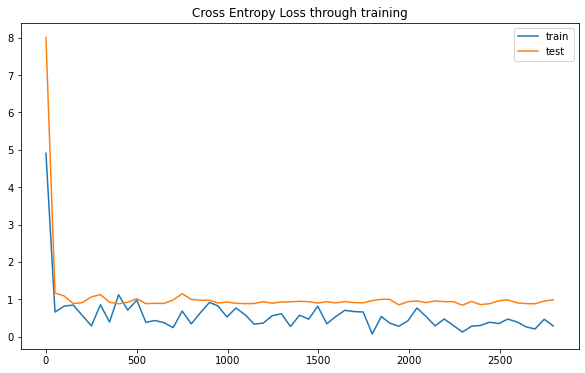

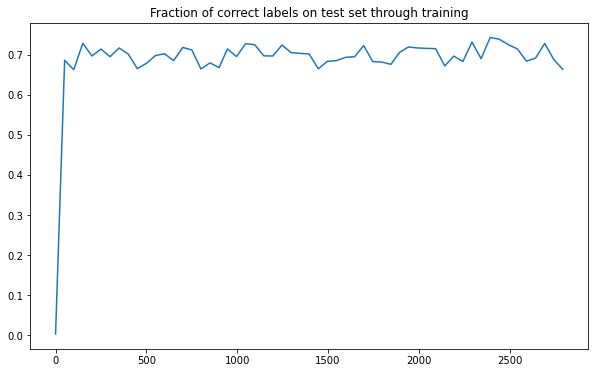

In [46]:
train_scores = []
test_scores = []
Ys_pred = n.zeros(Ys.shape)
for train_idxs,test_idxs in splitter.split(Xs,Ys):
    
    # Load scaled data
    X_train = Xs[train_idxs]
    Y_train = Ys[train_idxs]
    
    X_test = Xs[test_idxs]
    Y_test = Ys[test_idxs]
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    # Set up the model
    trackers = {'test_loss' : [], 't' : [], 'train_loss' : [], 'test_frac_correct': []}
    best_model = None
    def track():
        for key in trackers.keys():
            trackers[key].append(globals()[key])
    layers = []
    prev_dim = D_in
    for dim in hidden_dims:
        layers += [torch.nn.Linear(prev_dim, dim),
                   torch.nn.ReLU()]
        prev_dim = dim
    layers += [torch.nn.Linear(prev_dim, D_out)]

    loss_fn = torch.nn.CrossEntropyLoss()
    model = nn.Sequential(*layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    t = 0
    end = False
    
    # Convert data to tensors
    features_train = torch.tensor(X_train).float(); targets_train = torch.tensor(Y_train);
    features_test = torch.tensor(X_test).float(); targets_test = torch.tensor(Y_test);
    for epoch_idx in range(n_epochs):
        print("### EPOCH {:2d} ###".format(epoch_idx))
        # Figure out what batch to look at
        indices = n.random.choice(range(targets_train.shape[0]), targets_train.shape[0], False)
        num_batches = len(indices) // N_batch + 1
        for batch_idx in range(num_batches):
            # extract the batch
            batch_train_x = features_train[indices[batch_idx*N_batch :(batch_idx+1)*N_batch]]
            batch_train_y = targets_train[indices[batch_idx*N_batch : (batch_idx+1)*N_batch]]
            # Forward pass: compute predicted y by passing x to the model.
            batch_train_y_pred = model(batch_train_x)

            # Compute and print loss.
            loss = loss_fn(batch_train_y_pred, batch_train_y)
            if batch_idx % print_interval == 0:
                prediction_test = model(features_test)
                train_loss = loss.item()
                test_loss= loss_fn(prediction_test, targets_test).item()


                pred_labels = n.argmax(prediction_test.detach().numpy(),axis=1)
                true_labels = targets_test.detach().numpy()
                correct_preds = n.array(pred_labels == true_labels, n.int)
                test_frac_correct = n.mean(correct_preds)

                if len(trackers['test_loss']) == 0 or test_loss < min(trackers['test_loss']):
                    best_model = copy.deepcopy(model)
                print("Batch {:3d}, Train Loss: {:5f}, Test Loss: {:5f}, Test Correct Frac: {:.3f}".format(batch_idx, train_loss, test_loss, test_frac_correct))
                track()

            t += 1
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if end: break
    
    
    train_score = 0
    test_score = test_frac_correct
    prediction_test = best_model(features_test)

    pred = n.argmax(prediction_test.detach().numpy(),axis=1)

#     true = targets_test.detach().numpy()
    Ys_pred[test_idxs] = pred
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    plt.plot(trackers['t'],trackers['train_loss'], label='train')
    plt.plot(trackers['t'],trackers['test_loss'], label='test')
    plt.title("Cross Entropy Loss through training")
    plt.legend()
    plt.show()
    plt.plot(trackers['t'], trackers['test_frac_correct'])
    plt.title("Fraction of correct labels on test set through training")
    plt.show()

(0.0, 1.0)

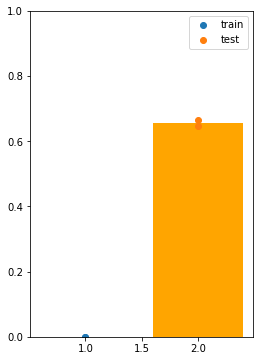

In [47]:
plt.figure(figsize=(4,6))
plt.bar([1,2],[n.mean(train_scores), n.mean(test_scores)], color=['blue','orange'])
plt.scatter([1]*n_splits, train_scores, label='train')
plt.scatter([2]*n_splits, test_scores, label='test')
plt.legend()
plt.ylim(0,1)

In [49]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

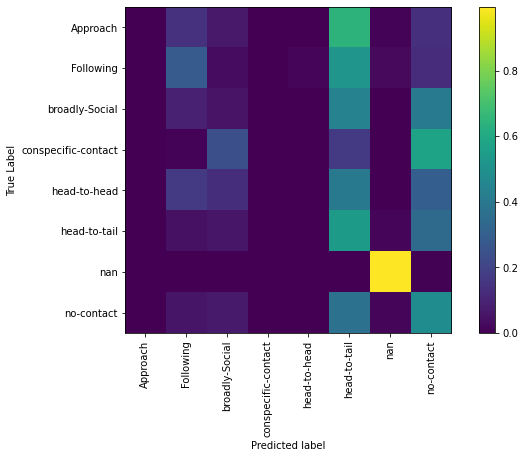

In [51]:
plt.imshow(confusion_matrix((Ys),(Ys_pred), normalize='true'), vmin=0)
# plt.xticks(unique_labels)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.xticks(n.arange(len(unique_labels)),label_encoder.inverse_transform(n.arange(len(unique_labels))), rotation=90);
plt.yticks(n.arange(len(unique_labels)),label_encoder.inverse_transform(n.arange(len(unique_labels))), rotation=0);